# Tutorial: Supervised Learning Problem and Least Squares

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F02_tutorial_supervised_learning_problem_ols.ipynb)

Tutorial to the classes [Supervised Learning Problem and Least Squares](02_supervised_learning_problem.ipynb) and [Ordinary Least Squares](03_ordinary_least_squares.ipynb).

<div class="alert alert-block alert-info">
    <b>Tutorial Objectives</b>
    
- Read, plot and analyze train data
- Use supervised learning to predict the regional electricity consumption of France in response electric heating based on temperature data
- Test the linear least squares (OLS) model
- Evaluate their performance by estimating their Expected Prediction Errors (EPE) using test data
</div>

## Dataset presentation

- Input:
  - 2m-temperature
    - Domain: Metropolitan France
    - Spatial resolution: regional average
    - Time resolution: hourly
    - Period: 2014-2019
    - Units: °C
    - Source: [MERRA-2 reanalysis](https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/)
- Target:
  - Electricity demand
    - Domain: Metropolitan France
    - Spatial resolution: regional sum
    - Time resolution: hourly
    - Period: 2014-2018
    - Units: MWh
    - Source: [RTE](https://opendata.reseaux-energies.fr/)

## Reading and pre-analysis of the input and output data

### Import data-analysis and plot modules and define paths

In [1]:
# Path manipulation module
from pathlib import Path
# Numerical analysis module
import numpy as np
# Formatted numerical analysis module
import pandas as pd
# Plot module
import matplotlib.pyplot as plt
# Default colors
RC_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
# Set data directory
data_dir = Path('data')

# Set keyword arguments for pd.read_csv
kwargs_read_csv = dict()

# Set first and last years
FIRST_YEAR = 2014
LAST_YEAR = 2019

# Define temperature filepath
temp_filename = 'surface_temperature_merra2_{}-{}.csv'.format(
    FIRST_YEAR, LAST_YEAR)
temp_filepath = Path(data_dir, temp_filename)

# Define electricity demand filepath
dem_filename = 'reseaux_energies_demand_demand.csv'
dem_filepath = Path(data_dir, dem_filename)

### Reading and plotting the raw temperature data

> ***Question (code cells below)***
> - Use `pd.read_csv` with the filepath and appropriate options to make sure to get the column names and the index as dates (`DatetimeIndex`).
> - Use the `resample` method from the data frame to compute daily means.
> - Plot the `'Île-de-France'` daily-mean temperature time series for (a) the whole period, (b) one year, (c) one month in winter and (d) one month in summer on 4 different figures (use `plt.figure`) using `plt.plot` or the `plot` method from data frames (preferably).
> - Use the `mean` and `var` methods to get mean and variance of the daily-mean temperature.

In [3]:
pd.read_csv?

Mean: Grand Est                     10.618527
Nouvelle-Aquitaine            12.864047
Auvergne-Rhône-Alpes          10.234978
Bourgogne-Franche-Comté       10.995382
Bretagne                      11.984747
Centre-Val de Loire           11.951470
Île-de-France                 11.293667
Occitanie                     12.580999
Hauts-de-France               10.731459
Normandie                     11.045734
Pays de la Loire              12.254374
Provence-Alpes-Côte d'Azur    12.128236
dtype: float64

Var: Grand Est                     51.904292
Nouvelle-Aquitaine            39.951391
Auvergne-Rhône-Alpes          51.123997
Bourgogne-Franche-Comté       50.578793
Bretagne                      22.048956
Centre-Val de Loire           44.914277
Île-de-France                 42.474751
Occitanie                     44.550002
Hauts-de-France               35.425500
Normandie                     30.995746
Pays de la Loire              33.354190
Provence-Alpes-Côte d'Azur    45.627665
dtype: float6

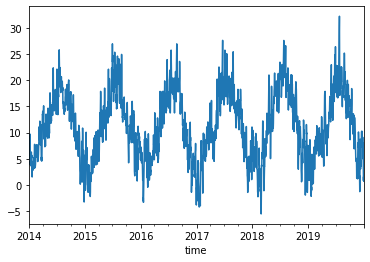

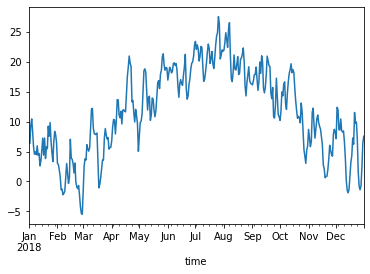

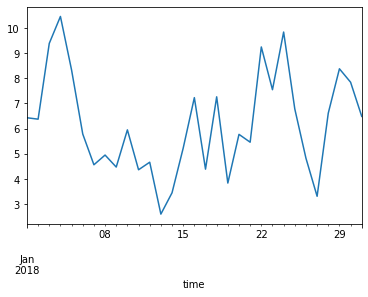

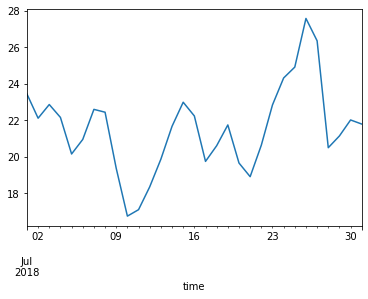

In [4]:
# Read hourly temperature data averaged over each region
df_temp_hourly = pd.read_csv(temp_filepath, index_col=0, parse_dates=True, header=0)

# Get daily-mean temperature
df_temp = df_temp_hourly.resample('D').mean()

# Select Île-de-France region
region_name = 'Île-de-France'
df_temp_idf = df_temp[region_name]

# Plot daily-mean temperature time series
plt.figure()
df_temp_idf.plot()

plt.figure()
df_temp_idf['2018'].plot()

plt.figure()
df_temp_idf['2018-01'].plot()

plt.figure()
df_temp_idf['2018-07'].plot()

# Compute mean and variance of daily temperature
print('Mean:', df_temp.mean())
print('\nVar:', df_temp.var())

### Reading and plotting the demand data

> ***Question***
> - Same question for the demand but with daily sums instead of daily means

Mean: Auvergne-Rhône-Alpes          363898.664537
Bourgogne-Franche-Comté       117275.267914
Bretagne                      121530.806025
Centre-Val de Loire           102960.129165
Grand Est                     250827.105888
Hauts-de-France               278630.089000
Île-de-France                 389537.549977
Normandie                     153124.579644
Nouvelle-Aquitaine            237656.720675
Occitanie                     204914.729804
Pays de la Loire              148366.516659
Provence-Alpes-Côte d'Azur    224488.494751
dtype: float64

Var: Auvergne-Rhône-Alpes          4.712698e+09
Bourgogne-Franche-Comté       5.803355e+08
Bretagne                      8.156587e+08
Centre-Val de Loire           5.936279e+08
Grand Est                     2.029647e+09
Hauts-de-France               2.366312e+09
Île-de-France                 7.745021e+09
Normandie                     1.002639e+09
Nouvelle-Aquitaine            2.457684e+09
Occitanie                     1.975727e+09
Pays de la Loir

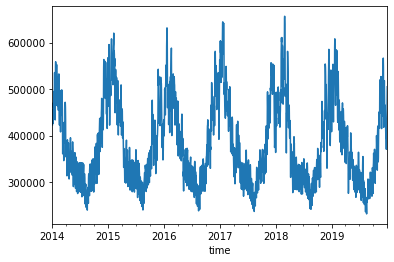

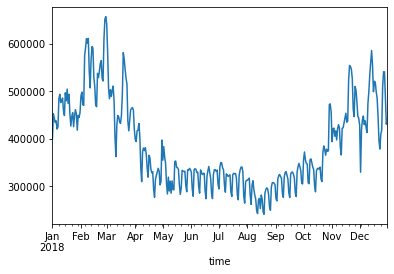

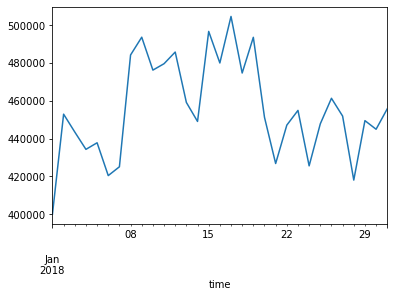

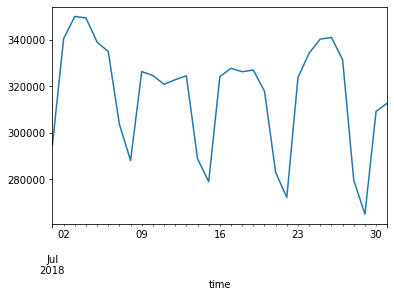

In [5]:
# Read hourly demand data averaged over each region
df_dem_hourly = pd.read_csv(dem_filepath, index_col=0, header=0, parse_dates=True)

# Get daily-summed demand
df_dem = df_dem_hourly.resample('D').sum()

# Select Île-de-France region
region_name = 'Île-de-France'
df_dem_idf = df_dem[region_name]

# Plot daily demand time series
plt.figure()
df_dem_idf.plot()

plt.figure()
df_dem_idf['2018'].plot()

plt.figure()
df_dem_idf['2018-01'].plot()

plt.figure()
df_dem_idf['2018-07'].plot()

# Compute mean and variance of daily demerature
print('Mean:', df_dem.mean())
print('\nVar:', df_dem.var())

### Analyzing the input and target data and their relationships

> ***Question (write answer in text box below)***
> - Describe the seasonality of the temperature in Île-de-France.
> - Are all years the same?
> - Describe the seasonal and weakly demand patterns.

Answer:

> ***Question***
> - Select the temperature and demand data for their largest common period using the `intersection` method of the `index` attribute of the data frames.
> - Represent a scatter plot of the daily demand versus the daily temperature using `plt.scatter`.

<AxesSubplot:xlabel='temp', ylabel='demand'>

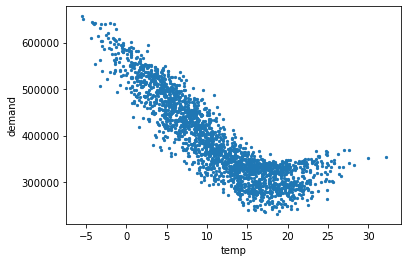

In [6]:
# Select the temperature and the demand data for their largest common period
# Solution 1
common_index = df_dem_idf.index.intersection(df_temp_idf.index)
df_dem_idf = df_dem_idf.loc[common_index]
df_temp_idf = df_temp_idf.loc[common_index]

# Solution 2
df = pd.merge(df_temp_idf, df_dem_idf, on='time')
df.columns = ['temp', 'demand']

# Scatter plot of demand versus temperature
df.plot(kind='scatter', x='temp', y='demand', s=5)

> ***Question***
> - Compute the correlation between the daily temperature and the daily demand in Île-de-France using `np.corrcoef`.
> - Compute the correlation between the monthly temperature and the monthly demand using the `resample` method.

In [7]:
# Correlation between the daily temperature and demand
print('Correlations - Daily:\t', np.corrcoef(df_temp_idf, df_dem_idf)[0, 1])

# Correlation between the monthly temperature and demand
print('Correlations - Monthly:\t', np.corrcoef(
    df_temp_idf.resample('M').mean(), df_dem_idf.resample('M').sum())[0, 1])

Correlations - Daily:	 -0.8693517429625005
Correlations - Monthly:	 -0.9527777496627706


## Ordinary Least Squares

> ***Question***
> - Perform an OLS with intercept using the entire dataset from the temperature using the formula for the optimal coefficients derived in [Supervised Learning Problem and Least Squares](2_supervised_learning_problem_ols.ipynb) (without Scikit-Learn). To do so:
>   - Prepare the input matrix and output vector with the `np.concatenate` function (for instance);
>   - Use the matrix-multiplication operator seen in [Introduction](1_introduction.ipynb) and the `np.linalg.inv` function to compute the optimal coefficients and print them.
> - Use the estimated coefficents to predict the target from the input train data.
> - Overlay your prediction to the scatter plot of the train data.
> - Compute the train Mean Squared Error (MSE) and the train coefficient of determination ($R^2$) and print them.

Estimated coefficients:
intercept    522117.056490
slope        -11739.278737
dtype: float64

Train MSE:	 1890684220.4109027
Train R2:	 0.7557724529919383


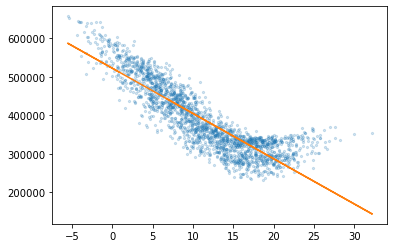

In [8]:
# Prepare the input matrix and output vector
x1_train = df_temp_idf.values[:, None]
X_train = np.concatenate([np.ones(x1_train.shape), x1_train], axis=1)
y_train = df_dem_idf.values

# Compute the optimal coefficients
beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

# Print the coefficients
print('Estimated coefficients:')
print(pd.Series(beta, index=['intercept', 'slope']))

# Predict from the train input data
y_train_pred = X_train @ beta

# Plot the prediction on top of the scatter plot of the train data
plt.scatter(x1_train, y_train, s=5, alpha=0.2)
plt.plot(x1_train, y_train_pred, color=RC_COLORS[1])

# Compute the train MSE and R2 and print them
mse_train = ((y_train - y_train_pred)**2).mean()
r2_train = 1. - mse_train / y_train.var()
print('\nTrain MSE:\t', mse_train)
print('Train R2:\t', r2_train)

> ***Question***
> - Compute the optimal coefficients using centered input temperatures.
> - Compute the optimal intercept alone using a single-column input matrix.
> - Compare the resulting two estimations of the intercept with the sample mean of the target train data.

In [9]:
# Compute the optimal coefficients using centered input temperatures
# Use a copy to make sure not to center the original data
x1_train = df_temp_idf.values.copy()[:, None]
x1_train_centered = x1_train - x1_train.mean()
X_train = np.concatenate([np.ones(x1_train_centered.shape),
                          x1_train_centered], axis=1)
y_train = df_dem_idf.values
beta_centered = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
print('Estimated coefficients - centered input:\t', beta_centered[0])

# Compute the optimal intercept alone using a single-column input matrix
X_train = np.ones(x1_train_centered.shape)
y_train = df_dem_idf.values
beta_intercept_only = np.linalg.inv(
    X_train.T @ X_train) @ (X_train.T @ y_train)
print('Estimated coefficients - intercept only:\t', beta_intercept_only[0])

# Compare the resulting two estimations of the intercept with the sample mean of the target train data
print('Target sample mean:\t\t\t\t', y_train.mean())

Estimated coefficients - centered input:	 389537.5499771794
Estimated coefficients - intercept only:	 389537.5499771794
Target sample mean:				 389537.5499771794


> ***Question***
> - Perform an OLS fit with intercept using the entire dataset to predict the demand from the temperature using Scikit-learn. To do so:
>   - Import the `linear_model` module from `sklearn` (Scikit-Learn)
>   - Define a regressor using `linear_model.LinearRegression` (by default, the regressor is configured to fit an intercept in addition to the features, see `fit_intercept` option)
>   - Prepare the input matrix and output vector for the `fit` method of the regressor
>   - Apply the `fit` method to the input and output
> - Print the fitted coefficients using the `coef_` attribute of the regressor.
> - Compute the train $R^2$ coefficient using the `score` method of the regressor.
> - Compare the resulting coefficients and score to those obtained above by applying the formulas yourself.

In [12]:
# Import linear_model from sklearn
from sklearn import linear_model

# Define a linear regressor
reg = linear_model.LinearRegression(fit_intercept=True)

# Prepare input and output for fit
X_train = df_temp_idf.values[:, None]
y_train = df_dem_idf.values

# Fit
reg.fit(X_train, y_train)

# Print
print('Estimated coefficients:')
print('intercept\t', reg.intercept_)
print('slope\t\t', reg.coef_[0])

# Compute the train R2 with Scikit-Learn and print them
r2_train = reg.score(X_train, y_train)
print('\nTrain R2:\t', r2_train)

Estimated coefficients:
intercept	 522117.05649032665
slope		 -11739.278736713733

Train R2:	 0.7557724529919383


Answer: 

> ***Question***
> - Define and array of 100 temperatures ranging from -5 to 35°C with `np.linspace`.
> - Make a prediction of the demand for these temperatures using the trained OLS model with the `predict` method of the regressor.
> - Plot this prediction over the scatter plot of the train data.
> - Does the demand prediction seem satisfactory over the whole range of temperatures?

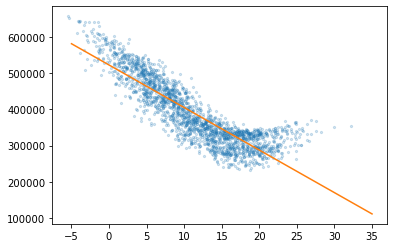

In [13]:
# Define an array of 100 temperatures ranging from -5 to 35°C
x_pred = np.linspace(-5., 35., 100) 

# Prepare these temperatures for the prediction
X_pred = x_pred[:, None]

# Predict
y_pred = reg.predict(X_pred)

# Plot the prediction on top of the scatter plot of the train data
plt.scatter(x1_train, y_train, s=5, alpha=0.2)
plt.plot(x_pred, y_pred, color=RC_COLORS[1])

Answer:

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.
Several slides and images are taken from the very good [Scikit-learn course](https://inria.github.io/scikit-learn-mooc/).

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>